<a href="https://colab.research.google.com/github/Appekip/japanGoogleColabProjects/blob/cnnPunch%2FKickDetect/figthDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras

from keras.utils import np_utils

from keras.models import Sequential

from keras.layers import Conv2D, AveragePooling2D

from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, MaxPooling2D

import numpy as np

from sklearn.model_selection import train_test_split

from PIL import Image

import glob

import matplotlib.pyplot as plt



folder = ["kick", "punch", "neutral"]

#kick = '/content/drive/MyDrive/poseDetect/kick'

#punch = '/content/drive/MyDrive/poseDetect/punch'

#standing = '/content/drive/MyDrive/poseDetect/neutral'

folder_test = ["kickTest", "punchTest", "neutralTest"]

image_size = 50

classes = ["kick", "punch","standing"]

num_classes = len(classes)



X_train = []

X_test  = []

y_train = []

y_test  = []



for index, name in enumerate(folder):

    dir = "/content/drive/MyDrive/figthDetect/" + name

    files = glob.glob(dir + "/*.jpg")

    for i, file in enumerate(files):

        image = Image.open(file)

        image = image.convert("RGB")

        image = image.resize((image_size, image_size))

        data = np.asarray(image)

        X_train.append(data)

        y_train.append(index)



for index, name in enumerate(folder_test):

    dir = "/content/drive/MyDrive/figthDetect/" + name

    files = glob.glob(dir + "/*.jpg")

    for i, file in enumerate(files):

        image = Image.open(file)

        image = image.convert("RGB")

        image = image.resize((image_size, image_size))

        data = np.asarray(image)

        X_test.append(data)

        y_test.append(index)



X_train = np.array(X_train)

X_test  = np.array(X_test)

y_train = np.array(y_train)

y_test  = np.array(y_test)



X_train = X_train.astype("float") / 255

X_test  = X_test.astype("float") / 255



#Convert correct label format 

y_train = np_utils.to_categorical(y_train, num_classes)

y_test  = np_utils.to_categorical(y_test, num_classes)

In [ ]:
#Building CNN
model = Sequential()

model.add(Conv2D(32,(3,3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

Epoch 1/100
37/37 [==============================] - 9s 32ms/step - loss: 0.9405 - accuracy: 0.5638 - val_loss: 1.9635 - val_accuracy: 0.3750
Epoch 2/100
37/37 [==============================] - 1s 22ms/step - loss: 0.8950 - accuracy: 0.6183 - val_loss: 1.6970 - val_accuracy: 0.3750
Epoch 3/100
37/37 [==============================] - 1s 21ms/step - loss: 0.8620 - accuracy: 0.6230 - val_loss: 2.4109 - val_accuracy: 0.3750
Epoch 4/100
37/37 [==============================] - 1s 22ms/step - loss: 0.8371 - accuracy: 0.6421 - val_loss: 2.4895 - val_accuracy: 0.3750
Epoch 5/100
37/37 [==============================] - 1s 22ms/step - loss: 0.7975 - accuracy: 0.6490 - val_loss: 2.9309 - val_accuracy: 0.2500
Epoch 6/100
37/37 [==============================] - 1s 22ms/step - loss: 0.7661 - accuracy: 0.6642 - val_loss: 1.4761 - val_accuracy: 0.3750
Epoch 7/100
37/37 [==============================] - 1s 21ms/step - loss: 0.7292 - accuracy: 0.6818 - val_loss: 3.1915 - val_accuracy: 0.3125
Epoch 

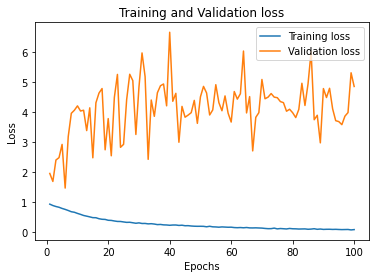

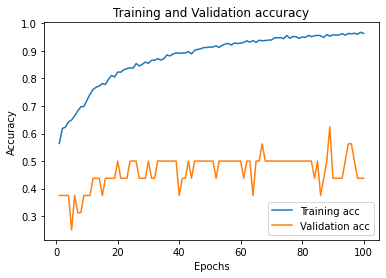

1/1 [==============================] - 0s 17ms/step - loss: 4.8604 - accuracy: 0.4375
test loss 4.860386371612549
test acc 0.4375


In [ ]:
# Training

hist =  model.fit(X_train, y_train,epochs=100,batch_size=128,validation_data=(X_test, y_test))



#Model evaluation

score=model.evaluate(X_test, y_test)

print('Test loss:', score[0])

print('test acc:', score[1])



#Learing graph

epochs = range(1, len(hist.history['accuracy']) + 1)



plt.plot(epochs, hist.history['loss'], label='Training loss', ls='-')

plt.plot(epochs, hist.history['val_loss'], label='Validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()



plt.plot(epochs, hist.history['accuracy'],  label='Training acc') 

plt.plot(epochs, hist.history['val_accuracy'], label="Validation acc")

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()



json_string = model.to_json()

open('test.json', 'w').write(json_string)

model.save_weights('test.hdf5')



# evaluate

score = model.evaluate(X_test, y_test)

print("test loss", score[0])

print("test acc",  score[1])

In [ ]:
import keras
import sys, os
import scipy
import numpy as np
from keras.models import model_from_json
from PIL import Image
import json

imsize = (50, 50)
# You have to make testpic folder# Put your favourite image in the testpic
testpic = "/content/drive/MyDrive/figthDetect/testPic/"
keras_model = "./test.json"
keras_param = "./test.hdf5"
# 画像の読み込み関数
def load_image(path):
  img = Image.open(path)
  img = img.convert('RGB')
  img = img.resize(imsize)
# 画像データをnumpy配列の形式に変更    
  img = np.asarray(img)
  img = img / 255.0
  return img

def get_file(dir_path):
  filenames = os.listdir(dir_path)
  return filenames

pic = get_file(testpic)
model = model_from_json(open(keras_model).read())
model.load_weights(keras_param)
model.summary()
for i in pic:
  print(i) 
  # ファイル名の出力    
  img = load_image(testpic + i)
  #vec = model.predict(np.array([img]), batch_size=1)
  #prd = model.predict(np.array([img]))
  prd = model.predict(np.array([img]))
  print(prd)
  prelabel = np.argmax(prd, axis=1)
  # "folder" in the order of >>> followed by
  if prelabel == 0:
    print(">>> kick")
  elif prelabel == 1:
    print(">>> punch")
  elif prelabel == 2:
    print(">>> neutral")
  
print("#"*55)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 activation (Activation)     (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                        